## 데이터 다운로드

In [2]:
# import shutil

# filename = 'archive.zip'
# extract_dir = 'archive'
# archive_format = 'zip'

# shutil.unpack_archive(filename, extract_dir, archive_format)

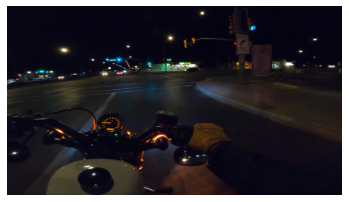

In [40]:
import os
from PIL import Image
import matplotlib.pyplot as plt

# 이미지 파일 경로
image_directory = '/aiffel/aiffel/AIFFEL_Quest/Main_Quest2/archive/www.acmeai.tech ODataset 1 - Motorcycle Night Ride Dataset/images'

# 이미지 파일 목록
image_files = [os.path.join(image_directory, filename) for filename in os.listdir(image_directory) if filename.endswith('.png')]

# 이미지 파일 로드
images = [Image.open(image_file) for image_file in image_files]

# 이미지 표시
plt.imshow(images[0])
plt.axis('off')  # 이미지 축 제거
plt.show()


In [42]:
# 이미지 파일 수
num_images = len(image_files)

# 이미지 파일 이름 출력
print("Image Files:")
for image_file in image_files:
    print(image_file)

# 이미지 파일 수 출력
print(f"Total number of images: {num_images}")


Image Files:
/aiffel/aiffel/AIFFEL_Quest/Main_Quest2/archive/www.acmeai.tech ODataset 1 - Motorcycle Night Ride Dataset/images/night ride (75).png
/aiffel/aiffel/AIFFEL_Quest/Main_Quest2/archive/www.acmeai.tech ODataset 1 - Motorcycle Night Ride Dataset/images/night ride (28).png___fuse.png
/aiffel/aiffel/AIFFEL_Quest/Main_Quest2/archive/www.acmeai.tech ODataset 1 - Motorcycle Night Ride Dataset/images/night ride (20).png___fuse.png
/aiffel/aiffel/AIFFEL_Quest/Main_Quest2/archive/www.acmeai.tech ODataset 1 - Motorcycle Night Ride Dataset/images/Screenshot (412).png___save.png
/aiffel/aiffel/AIFFEL_Quest/Main_Quest2/archive/www.acmeai.tech ODataset 1 - Motorcycle Night Ride Dataset/images/night ride (40).png___fuse.png
/aiffel/aiffel/AIFFEL_Quest/Main_Quest2/archive/www.acmeai.tech ODataset 1 - Motorcycle Night Ride Dataset/images/night ride (57).png___fuse.png
/aiffel/aiffel/AIFFEL_Quest/Main_Quest2/archive/www.acmeai.tech ODataset 1 - Motorcycle Night Ride Dataset/images/night ride (7

In [47]:
# 이미지 데이터를 저장할 변수 초기화
images_data = []
fuse_data = []
save_data = []

# 원본 이미지 파일 경로
image_dir = '/aiffel/aiffel/AIFFEL_Quest/Main_Quest2/archive/www.acmeai.tech ODataset 1 - Motorcycle Night Ride Dataset/images'

# 이미지 파일 목록을 가져오기
image_files = os.listdir(image_dir)

# 이미지 파일을 images_data, fuse_data, save_data로 나누어 저장
for image_file in image_files:
    if "___fuse.png" in image_file:
        fuse_data.append(image_file)
    elif "___save.png" in image_file:
        save_data.append(image_file)
    else:
        images_data.append(image_file)

# 출력 변수를 사용할 수 있습니다.
print("Images Data:", len(images_data))
print("Fuse Data:", len(fuse_data))
print("Save Data:", len(save_data))


Images Data: 200
Fuse Data: 200
Save Data: 200


**600개의 데이터가 있다.**

## 데이터 전처리

1. np

In [96]:
from PIL import Image

def change_file_to_np(image_files, batch_size=32):
    images_np = []
    num_images = len(image_files)
    num_batches = (num_images + batch_size - 1) // batch_size

    for batch_idx in range(num_batches):
        start_idx = batch_idx * batch_size
        end_idx = min((batch_idx + 1) * batch_size, num_images)

        batch_image_files = image_files[start_idx:end_idx]
        batch_images_np = []

        for image_file in batch_image_files:
            image_path = os.path.join(image_dir, image_file)
            image_pil = Image.open(image_path).convert("RGB")  # Convert image to RGB
            image_pil_resized = image_pil.resize(input_size)
            image_np = np.array(image_pil_resized) / 255.0
            batch_images_np.append(image_np)

        batch_images_np = np.array(batch_images_np)
        images_np.extend(batch_images_np)

    images_np = np.stack(images_np, axis=0)
    return images_np

# 이미지 파일명을 리스트로 저장
image_files = os.listdir(image_dir)

# 이미지 데이터를 numpy 배열로 변환
images_np = change_file_to_np(images_data)
fuse_np = change_file_to_np(fuse_data)
save_np = change_file_to_np(save_data)


**images_np와 fuse_np 사용!**

2. 데이터 분할

In [215]:
from sklearn.model_selection import train_test_split

# images_np, fuse_np 데이터를 train과 test로 분할
train_images, test_images, train_fuse, test_fuse = train_test_split(images_np, fuse_np, test_size=0.2, random_state=42)

# 분할된 데이터의 크기 확인
print("Train images shape:", train_images.shape)
print("Test images shape:", test_images.shape)
print("Train fuse shape:", train_fuse.shape)
print("Test fuse shape:", test_fuse.shape)


Train images shape: (160, 128, 128, 3)
Test images shape: (40, 128, 128, 3)
Train fuse shape: (160, 128, 128, 3)
Test fuse shape: (40, 128, 128, 3)


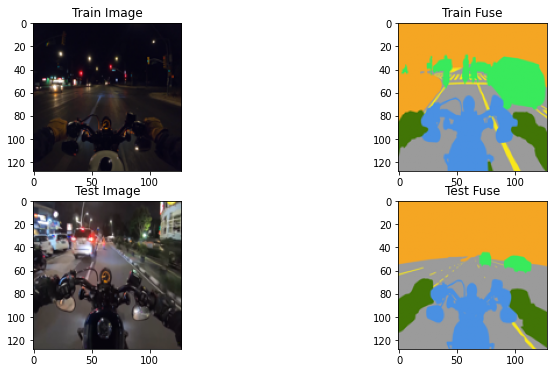

In [216]:
import matplotlib.pyplot as plt

# train 데이터 중 첫 번째 이미지와 fuse를 선택
train_image_0 = train_images[0]
train_fuse_0 = train_fuse[0]

# test 데이터 중 첫 번째 이미지와 fuse를 선택
test_image_0 = test_images[0]
test_fuse_0 = test_fuse[0]

# 시각화
plt.figure(figsize=(12, 6))

# Train 데이터
plt.subplot(2, 2, 1)
plt.imshow(train_image_0)
plt.title("Train Image")

plt.subplot(2, 2, 2)
plt.imshow(train_fuse_0)
plt.title("Train Fuse")

# Test 데이터
plt.subplot(2, 2, 3)
plt.imshow(test_image_0)
plt.title("Test Image")

plt.subplot(2, 2, 4)
plt.imshow(test_fuse_0)
plt.title("Test Fuse")

plt.show()

3. augmentation

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


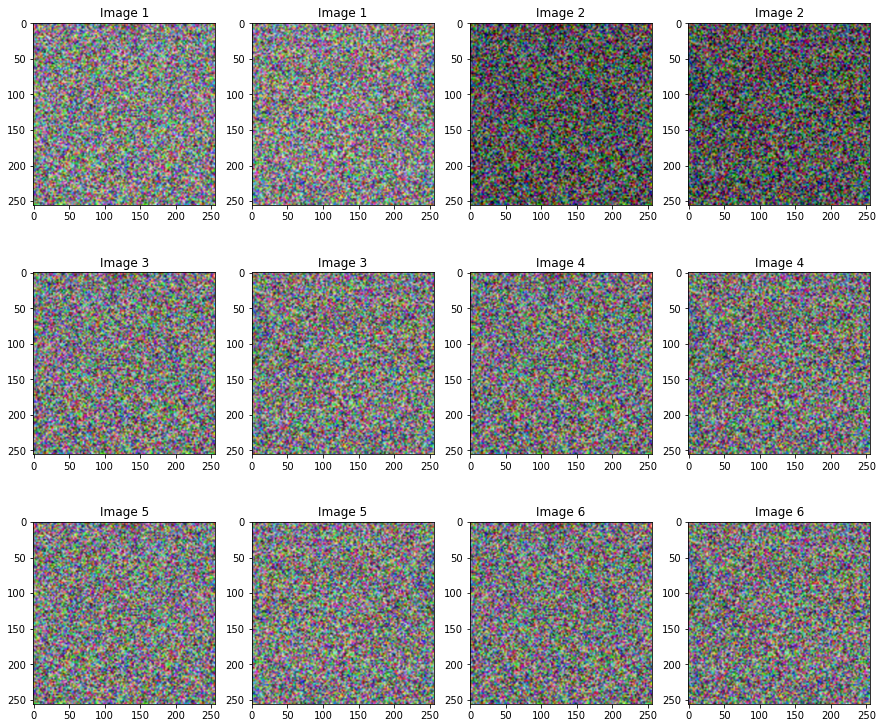

## 모델 설계

1024까지 층을 쌓아보자

Dropout과 BatchNormalization을 활용해 성능을 높여보자

U-Net 인코더

In [154]:
from keras.layers import Layer

class Encoder(Layer):
    
    def __init__(self, filters, rate=0.2, pooling=True, **kwargs):
        super(Encoder, self).__init__(**kwargs)
        
        self.filters = filters
        self.rate = rate
        self.pooling = pooling
        
        self.bn = BatchNormalization()
        self.c1 = Conv2D(filters, kernel_size=3, strides=1, padding='same', activation='relu', kernel_initializer='he_normal')
        self.drop = Dropout(rate)
        self.c2 = Conv2D(filters, kernel_size=3, strides=1, padding='same', activation='relu', kernel_initializer='he_normal')
        self.pool = MaxPool2D()
    
    def call(self, X):
        x = self.c2(self.drop(self.c1(self.bn(X))))
        if self.pooling:
            y = self.pool(x)
            return x, y
        return x
    
    def get_config(self):
        base_config = super().get_config()
        return {**base_config, "filters":self.filters, "rate":self.rate,"pooling":self.pooling}

U-Net 디코더

In [155]:
class Decoder(Layer):
    
    def __init__(self, filters, rate, **kwargs):
        super(Decoder, self).__init__(**kwargs)
        
        self.filters = filters
        self.rate = rate
        
        self.cT = Conv2DTranspose(filters, kernel_size=3, strides=2, padding='same', activation='relu', kernel_initializer='he_normal')
        self.bn = BatchNormalization()
        self.skip = Concatenate()
        self.net = Encoder(filters, rate, pooling=False)
    
    def call(self, X):
        x, skip_x = X
        y = self.cT(self.bn(x))
        y = self.net(self.skip([y, skip_x]))
        return y
    
    def get_config(self):
        base_config = super().get_config()
        return {**base_config, "filters":self.filters, "rate":self.rate}

U-Net

In [156]:
InputL = Input(shape=(128,128,3), name="InputImage")

# Encoder Block 
c1, p1 = Encoder(filters=64,  rate=0.1, name="Encoder1")(InputL)
c2, p2 = Encoder(filters=128, rate=0.1, name="Encoder2")(p1)
c3, p3 = Encoder(filters=256, rate=0.2, name="Encoder3")(p2)
c4, p4 = Encoder(filters=512, rate=0.2, name="Encoder4")(p3)
c5, p5 = Encoder(filters=1024, rate=0.2, name="Encoder5")(p4)

# Encoding Layer
encodings = Encoder(filters=1024, rate=0.3, pooling=False, name="Encoding")(p5)

# Decoder Block
d = Decoder(1024, 0.2, name='Decoder1')([encodings, c5])
d = Decoder(512, 0.2, name='Decoder2')([d, c4])
d = Decoder(256, 0.2, name='Decoder3')([d, c3])
d = Decoder(128, 0.1, name='Decoder4')([d, c2])
d = Decoder(64, 0.1, name='Decoder5')([d, c1])

# Output
conv_out = Conv2D(3, kernel_size=3, padding='same', activation='sigmoid', name="Segmentator")(d)

# Model
model = Model(InputL, conv_out, name="UNet")
model.summary()

# Compile Model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

Model: "UNet"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
InputImage (InputLayer)         [(None, 128, 128, 3) 0                                            
__________________________________________________________________________________________________
Encoder1 (Encoder)              ((None, 128, 128, 64 38732       InputImage[0][0]                 
__________________________________________________________________________________________________
Encoder2 (Encoder)              ((None, 64, 64, 128) 221696      Encoder1[0][1]                   
__________________________________________________________________________________________________
Encoder3 (Encoder)              ((None, 32, 32, 256) 885760      Encoder2[0][1]                   
_______________________________________________________________________________________________

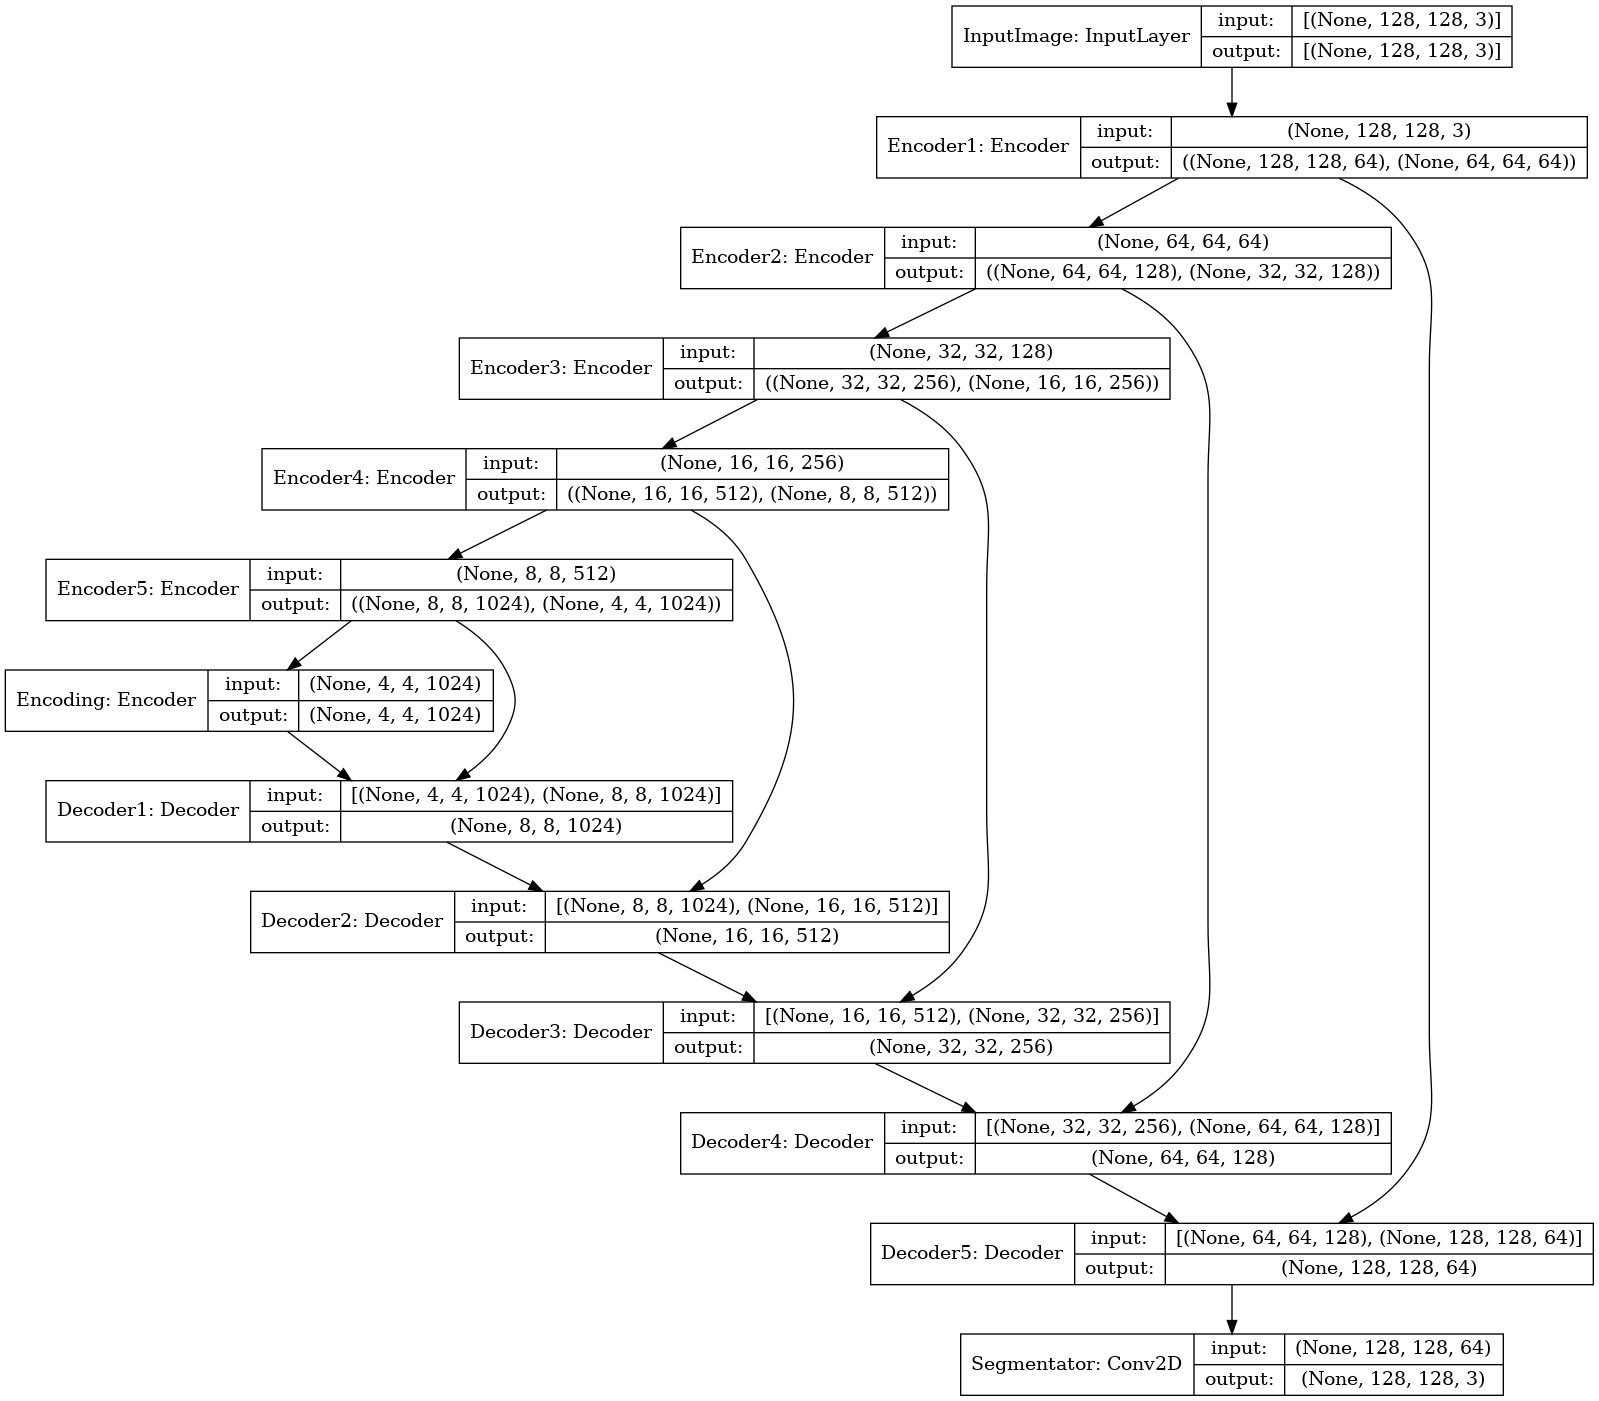

In [157]:
from tensorflow.keras.utils import plot_model

plot_model(model, "UNet.png", show_shapes=True)

## 모델 훈련하기

In [186]:
BATCH_SIZE = 16
SPE = len(images)//BATCH_SIZE

In [187]:
def show_image(image, title=None):
    plt.imshow(image)
    plt.title(title)
    plt.axis('off')

In [188]:
from keras.callbacks import Callback, ModelCheckpoint

# class ShowProgress(Callback):
#     def on_epoch_end(self, epoch, logs=None):
#         id = np.random.randint(len(train_images))
#         images = train_images[id]
#         fuse = train_fuse[id]
#         pred_mask = self.model(tf.expand_dims(image,axis=0))[0]
        
#         plt.figure(figsize=(10,8))
#         plt.subplot(1,3,1)
#         show_image(image, title="Original Image")
        
#         plt.subplot(1,3,2)
#         show_image(mask, title="Original Mask")
        
#         plt.subplot(1,3,3)
#         show_image(pred_mask, title="Predicted Mask")
            
#         plt.tight_layout()
#         plt.show()

**콜백함수 사용해서 결과 가장 좋을때의 에폭 저장**

In [189]:
cbs = [ModelCheckpoint("UNet-Pascal-VOC-image-Segmentation.h5", save_best_only=True)]

In [190]:
train_images.shape

(160, 128, 128, 3)

In [191]:
train_fuse.shape

(160, 128, 128, 3)

In [194]:
history = model.fit(
                    train_images, train_fuse,
                    validation_split=0.1,
                    epochs=50,
                    batch_size=BATCH_SIZE,
                    steps_per_epoch=SPE,
                    callbacks=cbs
)

Epoch 1/50
37/37 [==============================] - 13s 345ms/step - loss: 0.5268 - accuracy: 0.7938 - val_loss: 0.6266 - val_accuracy: 0.5910
Epoch 2/50
37/37 [==============================] - 13s 349ms/step - loss: 0.5240 - accuracy: 0.8030 - val_loss: 0.6203 - val_accuracy: 0.6292
Epoch 3/50
37/37 [==============================] - 13s 351ms/step - loss: 0.5236 - accuracy: 0.7985 - val_loss: 0.6207 - val_accuracy: 0.6151
Epoch 4/50
37/37 [==============================] - 13s 348ms/step - loss: 0.5214 - accuracy: 0.8015 - val_loss: 0.6240 - val_accuracy: 0.6191
Epoch 5/50
37/37 [==============================] - 13s 346ms/step - loss: 0.5202 - accuracy: 0.8053 - val_loss: 0.6215 - val_accuracy: 0.5970
Epoch 6/50
37/37 [==============================] - 13s 345ms/step - loss: 0.5197 - accuracy: 0.8045 - val_loss: 0.6280 - val_accuracy: 0.6279
Epoch 7/50
37/37 [==============================] - 13s 346ms/step - loss: 0.5191 - accuracy: 0.7999 - val_loss: 0.6264 - val_accuracy: 0.6108

/tmp/ipykernel_31/2399953478.py:11: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  plt.plot(epochs, val_loss, "b", label="Validation loss", color = 'red')
/tmp/ipykernel_31/2399953478.py:23: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  plt.plot(epochs, val_acc, "b", label="Validation accuracy", color = 'red')


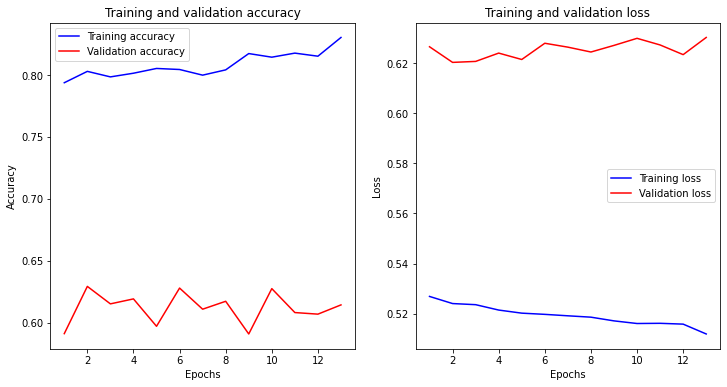

In [200]:
import matplotlib.pyplot as plt

# 손실 그래프
epochs = range(1, len(history.history["loss"]) + 1)
loss = history.history["loss"]
val_loss = history.history["val_loss"]

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 2)
plt.plot(epochs, loss, "b", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss", color = 'red')
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

# 정확도 그래프
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]

plt.subplot(1, 2, 1)
plt.plot(epochs, acc, "b", label="Training accuracy")
plt.plot(epochs, val_acc, "b", label="Validation accuracy", color = 'red')
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

plt.show()


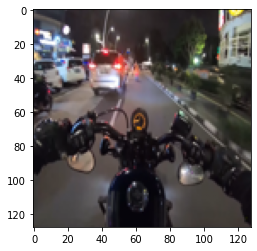

In [218]:
plt.imshow(test_image_0)

(40, 128, 128, 3)


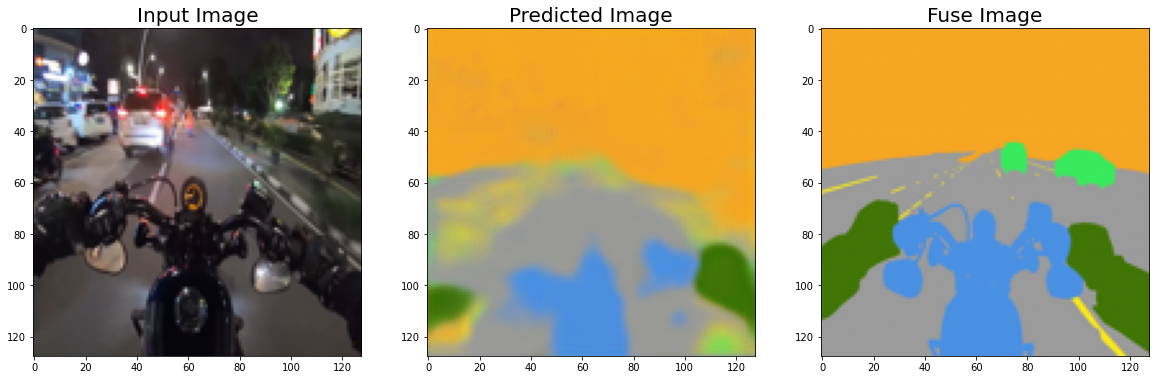

In [223]:
# 이미지 데이터의 형태 확인
print(test_images.shape)  # (40, 128, 128, 3)

# 첫 번째 이미지 선택하여 출력
plt.figure(figsize=(20, 10))
plt.subplot(1, 3, 1); plt.imshow(test_image_0); plt.title('Input Image', fontsize=20)
plt.subplot(1, 3, 2); plt.imshow(pred[0]); plt.title('Predicted Image', fontsize=20)
plt.subplot(1, 3, 3); plt.imshow(test_fuse_0); plt.title('Fuse Image', fontsize=20)
plt.show()


In [201]:
# 테스트 데이터로 모델 평가
test_loss, test_accuracy = model.evaluate(test_images, test_fuse)

# 평가 결과 출력
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)


2/2 [==============================] - 11s 3s/step - loss: 0.6105 - accuracy: 0.6419
Test Loss: 0.6105047464370728
Test Accuracy: 0.6418930292129517


아직 overfitting도 일어나지 않은 것 같다.

에폭을 더 많이 돌려봐야겠다.

콜백 조기종료를 없애고 다시 시도해 봐야겠다.